## Arboles de decision

In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

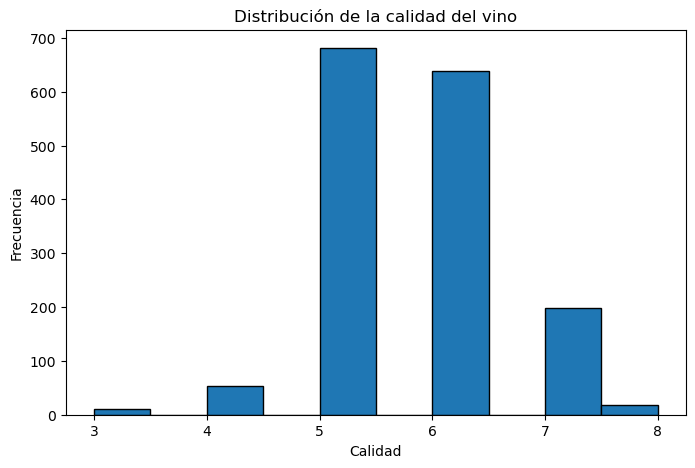

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(data['quality'], bins=10, edgecolor='black')
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

podemos observar que el histograma muestra que la calidad promedio del vino es media, de 5 o 6, las clases estan muy desbalanceadas las demas clases tienen my pocas.

In [14]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

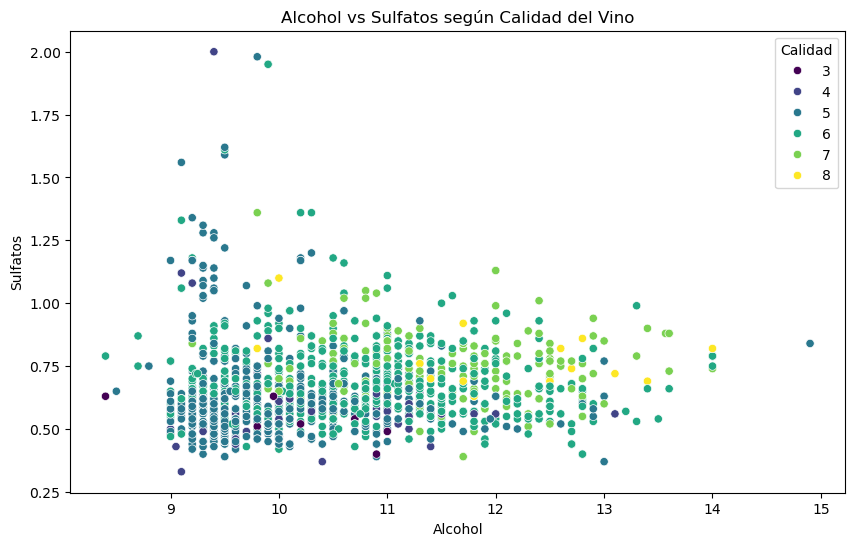

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='alcohol', y='sulphates', hue='quality', palette='viridis')
plt.title('Alcohol vs Sulfatos según Calidad del Vino')
plt.xlabel('Alcohol')
plt.ylabel('Sulfatos')
plt.legend(title='Calidad')
plt.show()

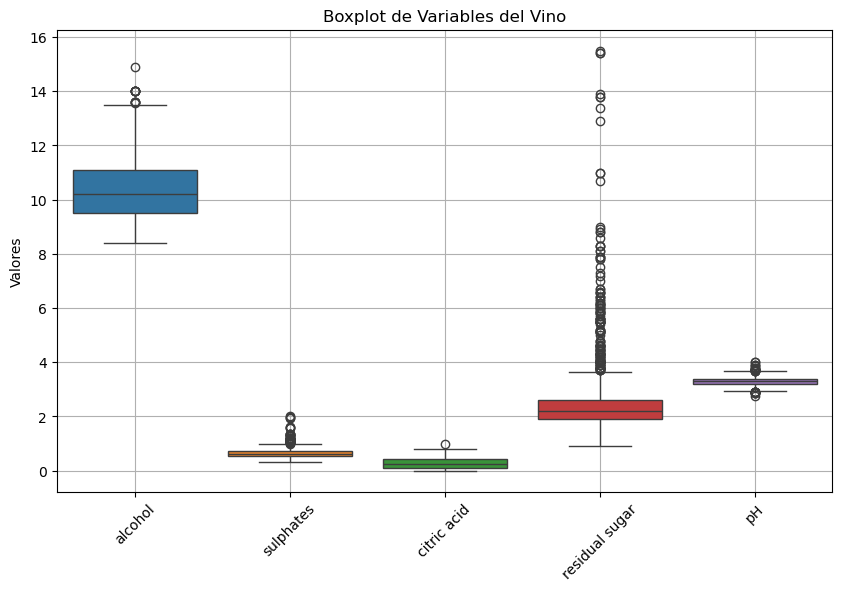

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
variables = ['alcohol', 'sulphates', 'citric acid', 'residual sugar', 'pH']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[variables])
plt.xticks(rotation=45)
plt.title('Boxplot de Variables del Vino')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

Preparar datos

In [21]:
X = data.drop("quality", axis=1)
y = data["quality"]

ahora haremos la división en entrenamiento y prueba

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ahora quiero crear y entrenar el árbol de decisión

In [27]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # puedes ajustar max_depth
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

ahora haremos la evaluación

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.36      0.40        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.27      0.27      0.26       320
weighted avg       0.53      0.56      0.54       320

Matriz de confusión:


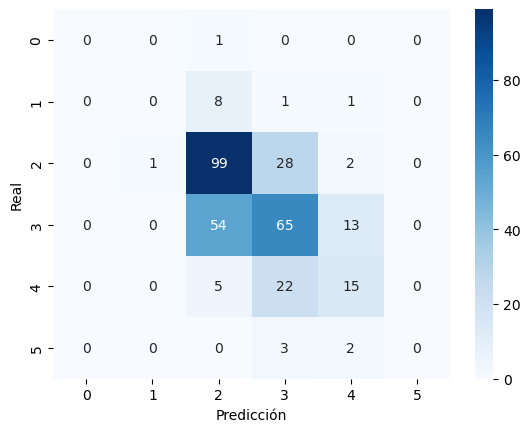

In [30]:
y_pred = clf.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

ahora visualizaremos el arbol

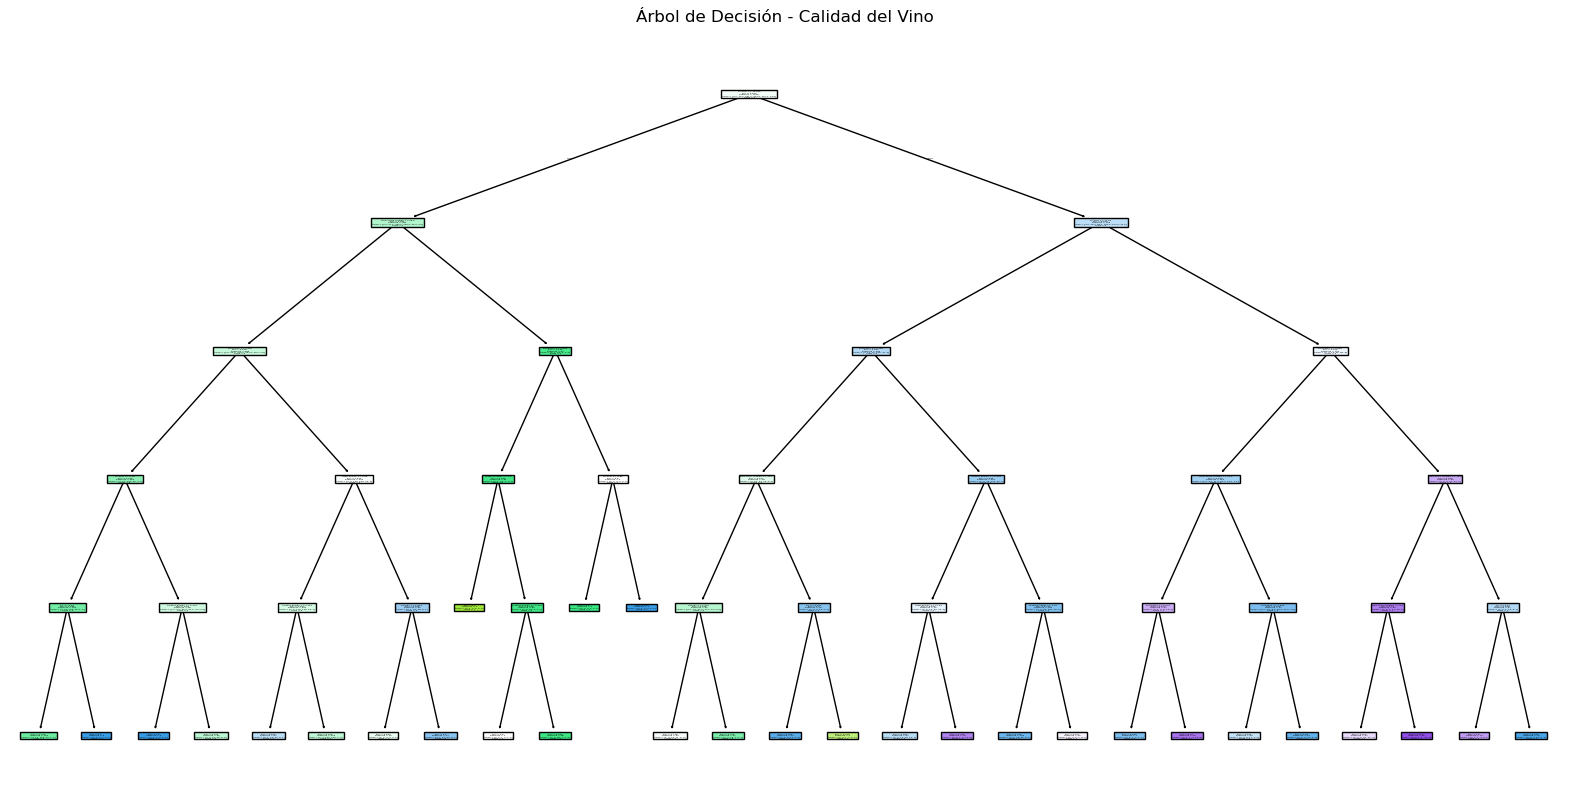

In [33]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())], filled=True)
plt.title("Árbol de Decisión - Calidad del Vino")
plt.show()

In [35]:
predictors_col = data.columns.drop("quality")

In [37]:
target_col = "quality"

In [39]:
predictors = data[predictors_col]

In [41]:
target = data[[target_col]]

In [43]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


Matriz de correlacion

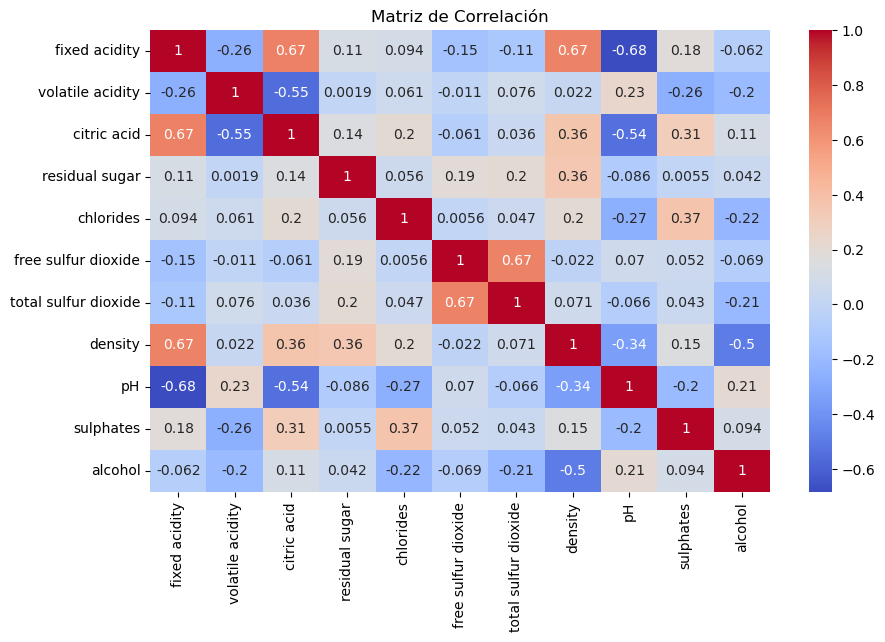

In [46]:
plt.figure(figsize=(10, 6))
corr = predictors.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [51]:
tree = DecisionTreeClassifier(random_state=13)
arbol = tree.fit(X_train, y_train)

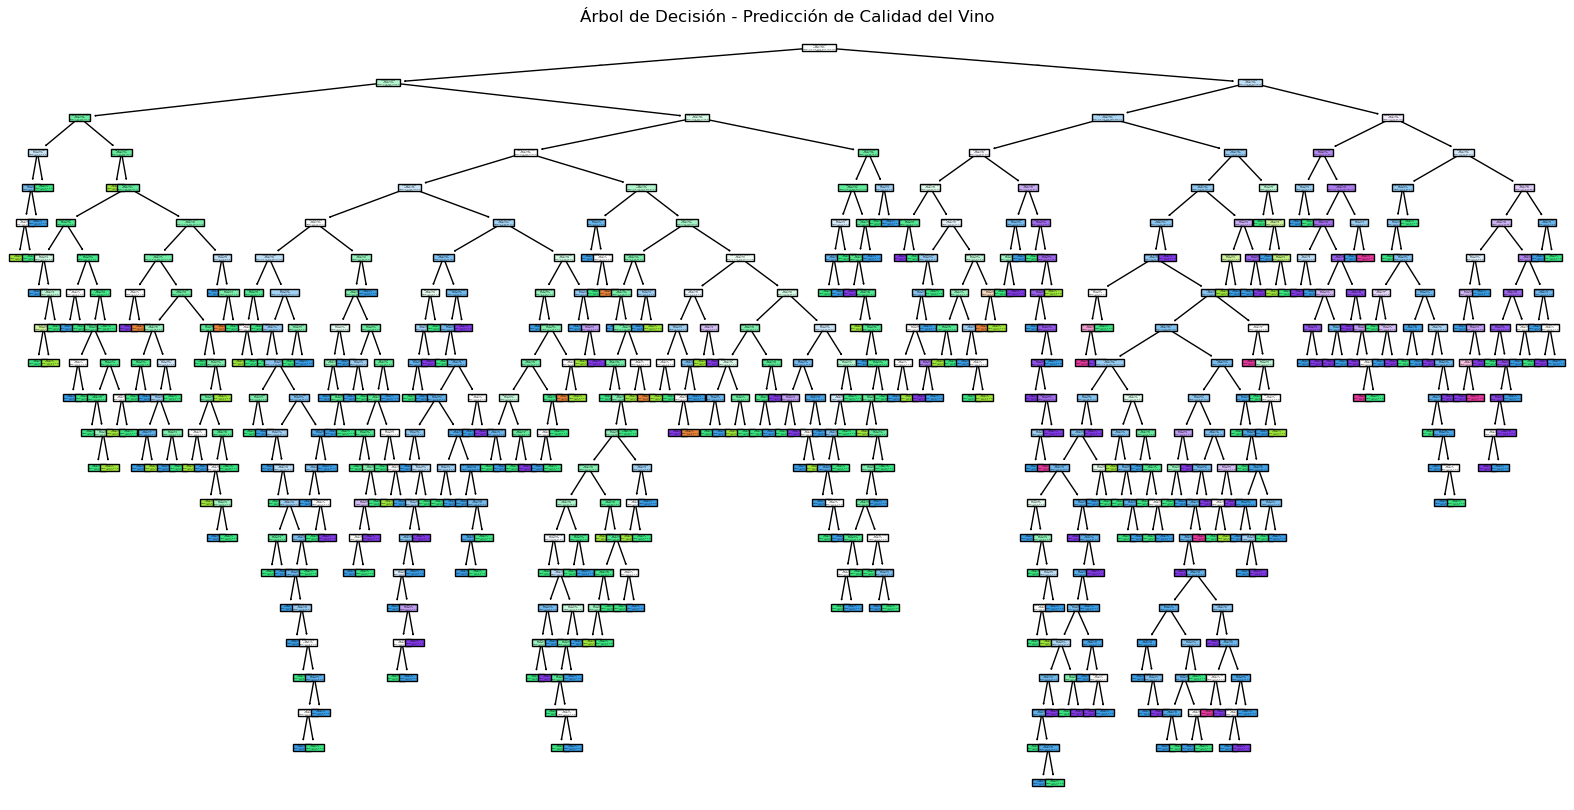

In [53]:
plt.figure(figsize=(20, 10))
plot_tree(arbol, feature_names=predictors.columns, class_names=[str(c) for c in sorted(target.quality.unique())], filled=True)
plt.title("Árbol de Decisión - Predicción de Calidad del Vino")
plt.show()

In [55]:
predicciones = arbol.predict(X_test)

In [57]:
conf_matrix = pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones,
                          rownames=['Actual'], colnames=['Predicciones'])
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
Predicciones  4    5   6   7  8
Actual                         
3             0    0   1   0  0
4             3    3   1   1  0
5             4  108  29   5  0
6             4   33  71  13  3
7             0    6  10  19  0
8             0    2   1   3  0


In [59]:
accuracy = accuracy_score(y_test, predicciones)
precision = precision_score(y_test, predicciones, average='weighted', zero_division=0)
recall = recall_score(y_test, predicciones, average='weighted', zero_division=0)
f1 = f1_score(y_test, predicciones, average='weighted', zero_division=0)

In [61]:
print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Accuracy:  0.6281
Precision: 0.6252
Recall:    0.6281
F1-score:  0.6255
